Neste projeto, tem-se 3 conjuto de de dados que serão utilizados para o treinamento do neurônio.

In [33]:
import seaborn as sb 
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plot
from matplotlib import rcParams

Como os dados se comportam antes de treinar o modelo

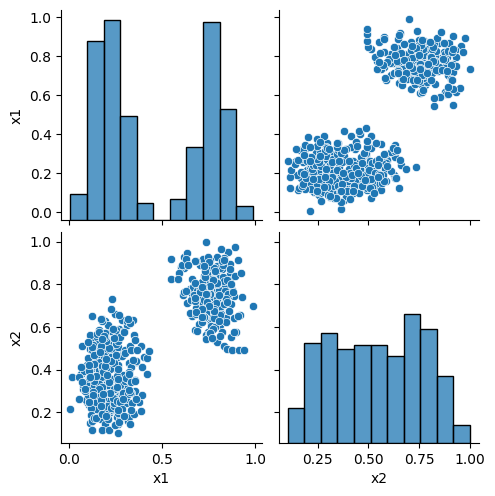

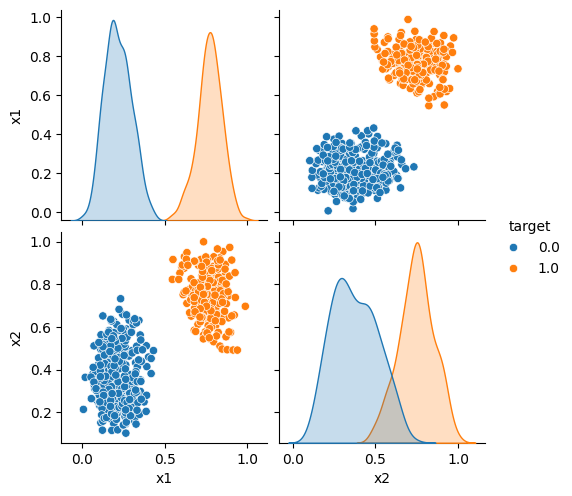

In [ ]:
dado = pd.read_csv('Painted_Data_MLP01.csv')
#dado = pd.read_csv('Painted_Data_MLP02.csv')
#dado = pd.read_csv('Painted_Data_MLP03.csv')
# Passando dados para matriz numpy
matriz_dados = dado.to_numpy()
# Matriz crua
matriz_crua = pd.DataFrame({"x1": matriz_dados[2:,0].astype(float), "x2": matriz_dados[2:, 1].astype(float)})
# Matriz de resposta
matriz_target = pd.DataFrame({"x1": matriz_dados[2:,0].astype(float), "x2": matriz_dados[2:, 1].astype(float), "target":matriz_dados[2:, 2].astype(float)})

# Plotar a minha matriz crua a com o target 
sb.pairplot(matriz_crua)
# Pinte os pontos de cores diferentes baseando-se no valor da coluna target(hue = "target")
sb.pairplot(matriz_target, hue = "target")

# Transformando matriz crua e target para numpy
numpy_crua = matriz_crua.to_numpy()
numpy_target = matriz_target.to_numpy()



Separar dados para teste e para treinamento

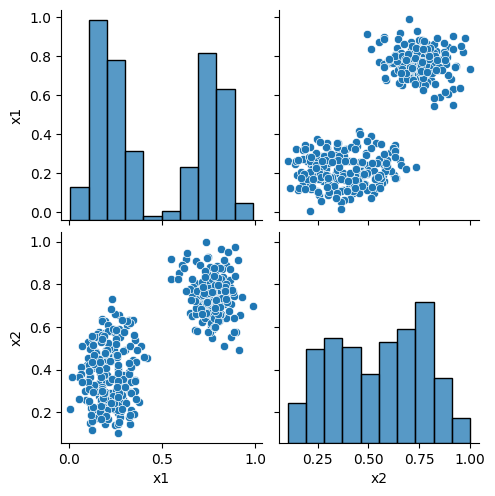

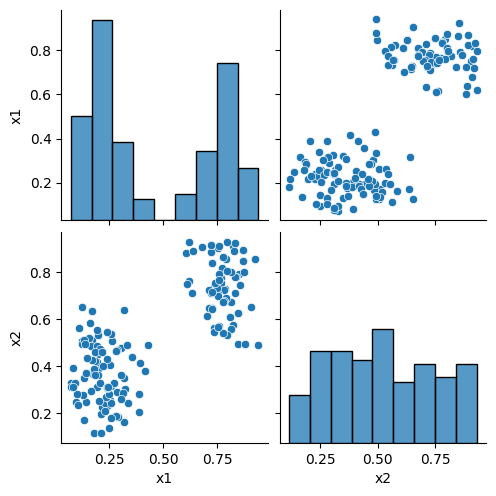

In [35]:
# 30% dos dados serão para teste
dados_teste = 0.3

# Separar o que é atributo do que é a resposta
x = matriz_crua
y = matriz_target['target']

# train_test_split é responsável separar os dados para treinamento e para teste
x_trein, x_test, y_trein, y_test = train_test_split(x, y, test_size = dados_teste, random_state =0)

# Plotar conjunto de dados de forma separada: teste e treinamento
sb.pairplot(pd.DataFrame(x_trein))
sb.pairplot(pd.DataFrame(x_test))


Criar Perceptron

[0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
Acurácia: 1.00%


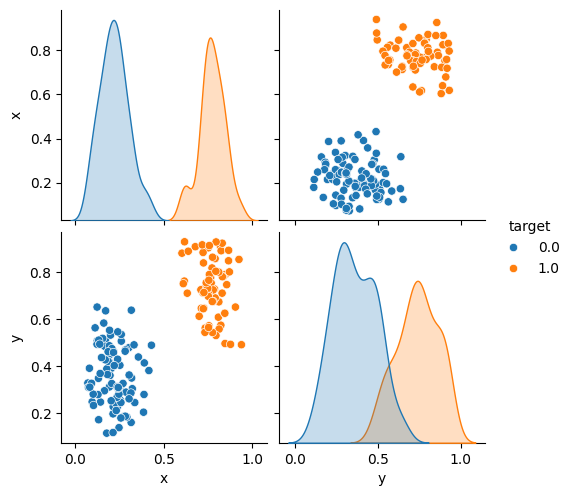

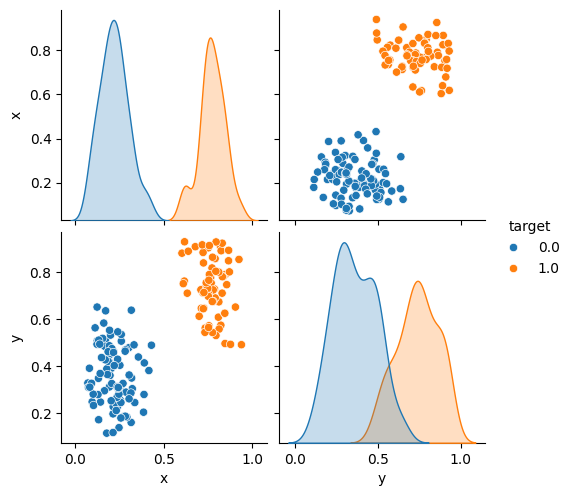

In [ ]:
# Criação neurônio
perceptron = Perceptron(penalty= None, eta0 = 0.05, random_state = 0, n_iter_no_change = 100)

# Treinar o perceptron
perceptron.fit(x_trein, y_trein)

# Acurácia nas amostras
y_previsto = perceptron.predict(x_test)
print(y_previsto)

# Acurácia do treinamento
print("Acurácia: {0:.2f}%".format(accuracy_score(y_test, y_previsto)))

np_xtest = x_test.to_numpy()
np_ytest = y_test.to_numpy()

# Observar em um gráfico essa separação da realidade
graf_separacao = pd.DataFrame({"x":np_xtest[:,0].astype(float),"y":np_xtest[:,1].astype(float),"target":np_ytest.astype(float)})
sb.pairplot(graf_separacao, hue = "target")

# Plotar as previsões dada pelo treinamento
graf_separacao_treinamento = pd.DataFrame({"x":np_xtest[:,0].astype(float),"y":np_xtest[:,1],"target":y_previsto.astype(float)})
sb.pairplot(graf_separacao_treinamento, hue = "target")

